## Task 3: Converting Image to Pencil Sketch with Python
Shreya Khale. Data Science Intern @LGM

### Importing the libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread(r'C:\Users\khale\OneDrive\Desktop\academics\resume\intenships\tataimg.webp',0)


In [3]:
#Color value just for own sake
print('Minimum color range',img.min())
print('Maximum color range',img.max())

Minimum color range 0
Maximum color range 255


### CONVERTING TO GRAYSCALE
#### Importance of grayscaling :
 -Dimension reduction: For example, In RGB images there are three color channels and three dimensions while grayscale images are single-dimensional.
 
 -Reduces model complexity: Consider training neural articles on RGB images of 10x10x3 pixels. The input layer will have 300 input nodes. On the other hand, the same neural network will need only 100 input nodes for grayscale images.
 
 -For other algorithms to work: Many algorithms are customized to work only on grayscale images e.g. Canny edge detection function pre-implemented in the OpenCV library works on Grayscale images only.

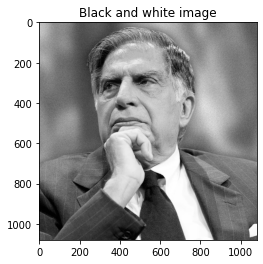

In [4]:
plt.imshow(img,cmap='gray')
plt.title('Black and white image')
plt.show()

### INVERTING THE IMAGE
-Images are represented using RGB or Red Green Blue values. Each can take up an integer value between 0 and 255 (both included). For example, a red color is represent using (255, 0, 0), white with (255, 255, 255), black with (0, 0, 0), etc.

-Inverting an image means reversing the colors on the image. For example, the inverted color for red color will be (0, 255, 255). Note that 0 became 255 and 255 became 0. This means that inverting an image is essentially subtracting the old RGB values from 255.

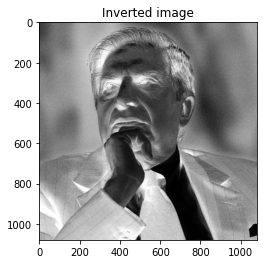

In [5]:
inv=255-img
plt.title('Inverted image')
plt.imshow(inv,cmap='gray')
plt.show()

### GAUSSIAN BLUR
-In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. 

-We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size.

-Gaussian blurring is highly effective in removing Gaussian noise from an image.

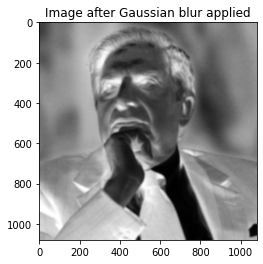

In [6]:
gblur=cv2.GaussianBlur(inv,ksize=(21,21),sigmaX=0,sigmaY=0)
plt.title('Image after Gaussian blur applied')
plt.imshow(gblur,cmap='gray')
plt.show()

### DODGING AND BURNING
-Dodging and Burning the image is to get the final output. These refer to techniques employed during the printing process in traditional photography. We can refer Dodging lightens an image, whereas burning darkens it.

-Here we create custom function dodge_img() which takes a grayscale image and an inverse image as a mask as the arguments to the function and then convert the image to a dodged image.

-Now to perform burning we would take the dodged image & the smoothened image as the arguments to the function which would darken the image so as to perform burning of an image.

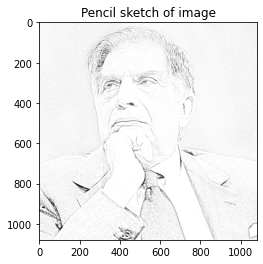

In [7]:
dodge= lambda image, mask: cv2.divide(image,255-mask,scale=256)
blended=dodge(img,gblur)
plt.title('Pencil sketch of image')
plt.imshow(blended,cmap='gray')
plt.show()

#### There it is, our sketch using OpenCV.